### 1. Install R packages

Uncomment section below if running for the first time

In [4]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("dada2")
install.packages("magrittr")
install.packages("stringr")
install.packages("data.table")
install.packages("broom")
install.packages("qualpalr")
install.packages("seqinr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BiocVersion', 'dada2'

also installing the dependencies ‘formatR’, ‘matrixStats’, ‘colorspace’, ‘lambda.r’, ‘futile.options’, ‘MatrixGenerics’, ‘DelayedArray’, ‘RCurl’, ‘GenomeInfoDbData’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘magrittr’, ‘pkgconfig’, ‘futile.logger’, ‘snow’, ‘BH’, ‘bitops’, ‘SummarizedExperiment’, ‘png’, ‘jpeg’, ‘S4Vectors’, ‘GenomeInfoDb’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘scales’, ‘tibble’, ‘withr’, ‘plyr’, ‘stringr’, ‘BiocParallel’, ‘Rsamtools’, ‘GenomicAlignments’, ‘Biobase’, ‘GenomicRanges’, ‘hwriter’, ‘zlibbioc’, ‘lattice’, ‘latticeExtra’, ‘Rhtslib’, ‘Rcpp’, ‘Biostrings’, ‘ggp

### 2. Load required libraries

In [6]:
library(dada2)
library(stringr)
library(data.table)
# library(broom)
library(qualpalr)
library(ShortRead)
library(Biostrings)
library(seqinr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: BiocParallel

Loading required package: Biostrings

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Att

### 3. File path setup

In [15]:
rawpath <- "raw"
wdpath <- "/Users/mann/github/domhain/2022-HIV_oral_microbiome/01-read_processing/" # change to where git repository was cloned
fnFs <- sort(list.files(rawpath, pattern="_R1_001.fastq.gz", full.names=T))
fnRs <- sort(list.files(rawpath, pattern="_R2_001.fastq.gz", full.names=T))
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)
head(sample.names, 50)
paste("Number of input samples: ", length(sample.names))

[1] "2L13-PD1"         "2L13-PE1"         "2L13-PF1"         "2L17-PE1"        
 [5] "2L17-PF1"         "2L2-PD1"          "2L2-PE1"          "2L23-PD1"        
 [9] "2L23-PE1"         "2L3-PF1"          "2L4-PF1"          "2L46-PE1"        
[13] "2L46-PF1"         "2L47-PE1"         "2L47-PF1"         "2L49-PF1"        
[17] "2L52-PF1"         "2L59-PF1"         "2L60-PE1"         "2L60-PF1"        
[21] "2L61-PD1"         "2L61-PE1"         "2L61-PF1"         "2L62-PF1"        
[25] "2L63-PE1"         "2L63-PF1"         "2L64-PD1"         "2L64-PE1"        
[29] "2L67-PF1"         "2L69-PF1"         "2L70-PF1"         "2L72-PE1"        
[33] "2L72-PF1"         "2L75-PD1"         "2L75PE1"          "4L59-PF1"        
[37] "DM00001V1PQ"      "DM00002V1PQ"      "DM00004V1PQ55"    "DM00004V1PQ65"   
[41] "DM00005V1PQ36-1"  "DM00005V1PQ46-2"  "DM00006V1PQ1"     "DM00007V1PQ1"    
[45] "DM00008V1PQ16-2"  "DM00008V1PQ26-1"  "DM00009V1PQ55"    "DM00009V1PQ65"   
[49] "DM00010V1PQ54"    "DM00010V1PQ64-65"

[1] "Number of input samples:  918"

### 4. Plot quality scores

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


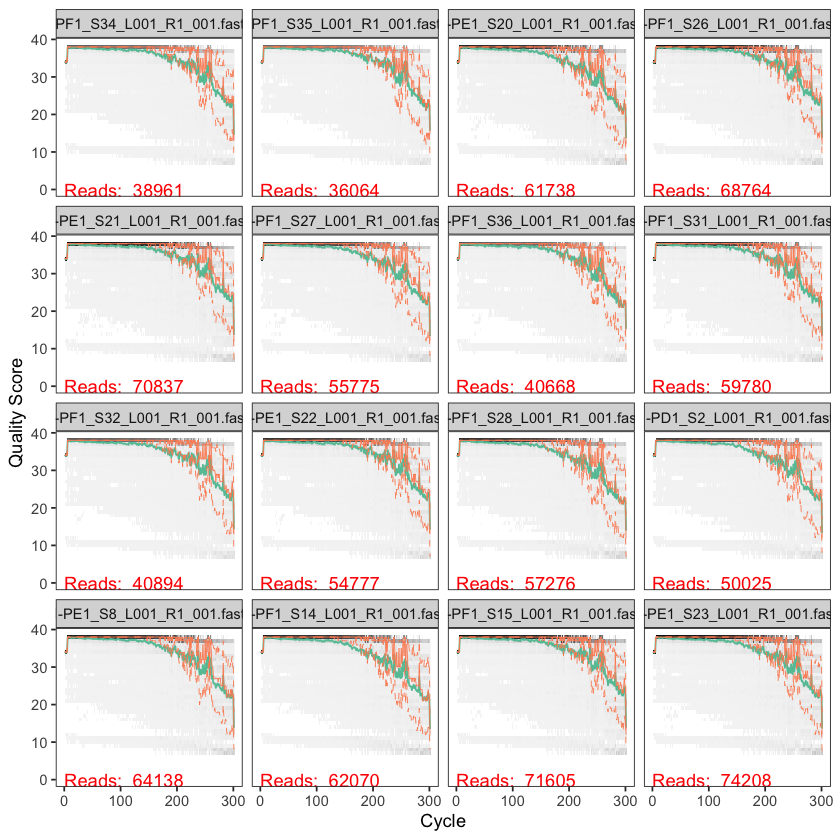

pdf 
  2

pdf 
  2

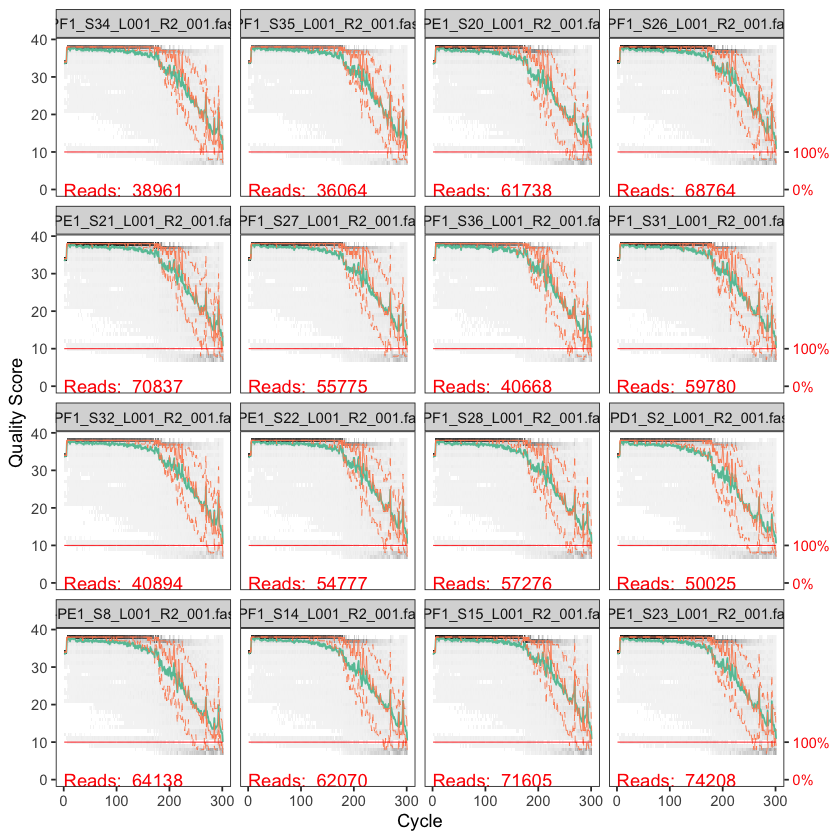

In [16]:
system("mkdir img") # ignore warning
fwdqual <- plotQualityProfile(fnFs[10:25])
revqual <- plotQualityProfile(fnRs[10:25])
fwdqual
revqual

pdf(paste(wdpath, "img/", "forward_quality_plot.pdf", sep=""))
fwdqual
dev.off()
pdf(paste(wdpath, "img/", "reverse_quality_plot.pdf", sep=""))
revqual
dev.off()


### 5. Preliminary filter (removes sequences with uncalled bases)

In [17]:
fnFs.filtN <- file.path(rawpath, "filtN", basename(fnFs)) # Put N-filtered files in filtN/ subdirectory
fnRs.filtN <- file.path(rawpath, "filtN", basename(fnRs))
filterAndTrim(fnFs, fnFs.filtN, fnRs, fnRs.filtN, maxN = 0, multithread = TRUE, compress = TRUE)

### 6. Primer removal 

In [ ]:
cutadapt <- as.character(system("which cutadapt", intern=T))
system("cutadapt --version")
path.cut <- file.path(rawpath, "cutadapt")
if(!dir.exists(path.cut)) dir.create(path.cut)
fnFs.cut <- file.path(path.cut, basename(fnFs))
fnRs.cut <- file.path(path.cut, basename(fnRs))
FWD.RC <- dada2:::rc("MAYGARAARMGNATGYTNCARGA")
REV.RC <- dada2:::rc("GMCATYTGRTCNCCRTCRAA")
# Trim FWD and the reverse-complement of REV off of R1 (forward reads)
R1.flags <- paste("-g", "MAYGARAARMGNATGYTNCARGA", "-a", REV.RC) 
# Trim REV and the reverse-complement of FWD off of R2 (reverse reads)
R2.flags <- paste("-G", "GMCATYTGRTCNCCRTCRAA", "-A", FWD.RC) 
for(i in seq_along(fnFs)) {
  system2(cutadapt, args = c("--cores=0", R1.flags, R2.flags, "-n", 2,"-o", fnFs.cut[i], "-p", fnRs.cut[i], fnFs.filtN[i], fnRs.filtN[i]))
}
cutFs <- sort(list.files(path.cut, pattern = "R1", full.names = TRUE))
cutRs <- sort(list.files(path.cut, pattern = "R2", full.names = TRUE))

### 7. Filter and trim reads

In [ ]:
filtFs <- file.path(path.cut, "filtered", basename(cutFs))
filtRs <- file.path(path.cut, "filtered", basename(cutRs))
out <- filterAndTrim(cutFs, filtFs, cutRs, filtRs, trimRight=25, maxN=c(0,0), maxEE=c(4,6), rm.phix=TRUE, matchIDs=TRUE, compress=TRUE, multithread=TRUE)
retained <- as.data.frame(out)
retained$percentage_retained <- retained$reads.out/retained$reads.in*100
retained

### 8. Learn and plot error rates

In [ ]:
set.seed(12349)
errF <- learnErrors(filtFs, multithread=T, random=T)
errR <- learnErrors(filtRs, multithread=T, random=T)
err.f.plt <- plotErrors(errF, nominalQ=TRUE) 
err.f.plt
pdf(paste(wdpath, "img/", "error_plot.pdf", sep=""))
err.f.plt
dev.off()

### 9. Dereplication

In [ ]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# reassign sample names
sample.names <- sapply(strsplit(basename(filtFs), "_"), `[`, 1)
names(derepFs) <- sample.names
names(derepRs) <- sample.names

### 10. Sample inference

In [ ]:
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

### 11. Merge paired-end reads

In [ ]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=T)

### 12. Construct sequence table

In [ ]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

### 13. Length filter

In [ ]:
table(nchar(colnames(seqtab)))

Filter out any ASVs that are shorter than 450 bp in length

In [ ]:
seqlens <- nchar(getSequences(seqtab))
seqtab.filt <- seqtab[,seqlens >= 450]
dim(seqtab.filt)

### 14. Sequence length distribution post filter

In [ ]:
length.histogram <- as.data.frame(table(nchar(getSequences(seqtab.filt))))
len.plt <- plot(x=length.histogram[,1], y=length.histogram[,2])
len.plt
pdf(paste(wdpath, "img/", "length_hist.pdf", sep=""))
len.plt
dev.off()

### 15. Remove chimeras

In [ ]:
seqtab.nochim <- removeBimeraDenovo(seqtab.filt, method="pooled", multithread=T, verbose=T)
dim(seqtab.nochim)
sum(seqtab.nochim)/sum(seqtab.filt)

### 16. Processing summary

In [ ]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nochimeras")
rownames(track) <- sample.names
track

### 17. Save output

In [ ]:
write.table(data.frame("row_names"=rownames(track),track),"read_retention.txt", row.names=FALSE, quote=F, sep="\t")
uniquesToFasta(seqtab.nochim, "rep_set.fa")
system("awk '/^>/{print \">ASV\" ++i; next}{print}' < rep_set.fa > rep_set_fix.fa")
system("mv rep_set_fix.fa rep_set.fa")

### 18. Clean up ASV names

In [ ]:
my_otu_table <- t(as.data.frame(seqtab.nochim)) 
ASV.seq <- as.character(unclass(row.names(my_otu_table))) 
ASV.num <- paste0("ASV", seq(ASV.seq), sep='') 
colnames(seqtab.nochim) <- ASV.num 
write.table(data.frame("row_names"=rownames(seqtab.nochim),seqtab.nochim),"sequence_table.merged.txt", row.names=FALSE, quote=F, sep="\t")